섹터 별로 수익률을 비교하고, 섹터 내부 종목별로 수익률은 어떻게 차이가 있는가?
 - 필요한 데이터 : 섹터별 종목, 섹터별 지수(가격), 기간, 섹터 내부 종목 가격

In [1]:
# 경고(worning) 비표시
!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
!mv malgun.ttf /usr/share/fonts/truetype/

zsh:1: command not found: wget
mv: rename malgun.ttf to /usr/share/fonts/truetype/: No such file or directory


In [6]:
#matplotlib 한글깨짐 지원
import platform
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False)  

In [9]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr

sectors_csv = pd.read_csv('../섹터별_종목리스트.csv').drop(['Unnamed: 0'], axis = 1) # 섹터별 종목리스트
stock = fdr.DataReader('005930', '2018') # 특정 종목 가격
df_krx = fdr.StockListing('KRX')[['Code', 'Name']] # 한국거래소 상장종목 전체
sectors_csv.head()

,2023 상반기 신규상장,SNS(소셜네트워크서비스),모바일솔루션(스마트폰),영상콘텐츠,창투사,K-뉴딜지수(2차전지),화폐/금융자동화기기(디지털화폐 등),메타버스(Metaverse),3D 낸드(NAND),2차전지(생산),...,건설기계,조선기자재,도시가스,항공/저가 항공사(LCC),면세점,원자력발전소 해체,LNG(액화천연가스),정유,애플페이,조선
0,스튜디오미르,유엔젤,유엔젤,스튜디오미르,린드먼아시아,SK아이이테크놀로지,케이씨티,비트나인,솔브레인홀딩스,LG화학,...,프리엠스,삼영엠텍,지에스이,티웨이항공,제이에스티나,휴림로봇,삼강엠앤티,SK이노베이션,나이스정보통신,HJ중공업
1,오브젠,인포뱅크,MDS테크,SM Life Design,플랜티넷,LG화학,로지시스,이노뎁,제우스,LG에너지솔루션,...,서연탑메탈,케이프,대성에너지,아시아나항공,신세계,에스앤더블류,POSCO홀딩스,GS,이루온,삼성중공업
2,한주라이트메탈,카카오,다날,SM C&C,미래에셋벤처투자,SKC,케이씨에스,엔피,심텍,삼성SDI,...,흥국,케이에스피,예스코홀딩스,진에어,호텔신라,비츠로테크,지역난방공사,S-Oil,한국정보통신,현대중공업
3,티이엠씨,아프리카TV,키네마스터,포바이포,TS인베스트먼트,솔루스첨단소재,한네트,에스넷,유진테크,SK이노베이션,...,혜인,삼강엠앤티,삼천리,대한항공,한국정보통신,두산에너빌리티,한국전력,NaN,NICE,한국조선해양
4,삼기이브이,가비아,폴라리스오피스,SBS,SV인베스트먼트,엘앤에프,프리엠스,코세스,원익IPS,NaN,...,디와이파워,상상인인더스트리,서울가스,AK홀딩스,토니모리,비에이치아이,대한해운,NaN,KG이니시스,대우조선해양


# 1. 섹터 별로 수익률을 비교하는 함수 생성하기기
- input : 섹터명
- output : 수익률

In [10]:
def get_sector_ror(sector, start_year):
    sector_stock_list = sectors_csv[sector].dropna().values
    sector_code_list = df_krx[df_krx['Name'].isin(sector_stock_list)]['Code'].values
    codes = df_krx.set_index('Code').to_dict()
    result = pd.DataFrame()
    for code in sector_code_list:
        stock_price = fdr.DataReader(code, start_year)[['Close']].rename(columns = {'Close':codes['Name'][code]}) # 특정 종목 가격
        result = pd.concat([result, stock_price], axis = 1)
    rate_of_return = result.pct_change()
    cum_ror = (rate_of_return + 1).cumprod() - 1
    return cum_ror

In [12]:
get_sector_ror('애플페이','2018')

,NICE,한국정보통신,KG이니시스,나이스정보통신,하인크코리아,이루온,셀피글로벌
Date,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,-1.748252e-02,-0.004184,-2.989130e-02,-0.008658,NaN,-0.014818,0.010438
2018-01-04,-1.048951e-02,-0.037657,-8.152174e-02,-0.002165,NaN,0.039515,0.048017
2018-01-05,6.993007e-03,-0.050209,-7.608696e-02,0.002165,NaN,0.039515,0.096033
2018-01-08,-1.110223e-16,-0.083682,-1.110223e-16,-0.002165,NaN,0.044903,0.087683
...,...,...,...,...,...,...,...
2023-05-16,-1.097902e-01,-0.164854,-3.586957e-01,0.019481,1.192399,-0.054782,-0.675157
2023-05-17,-1.118881e-01,-0.129707,-3.521739e-01,0.028139,1.242280,-0.018859,-0.675157
2023-05-18,-1.153846e-01,-0.133054,-3.521739e-01,0.038961,1.323040,0.003592,-0.675157


# 2. 섹터 내부 종목별로 수익률울 확인

In [13]:
sector_name = '애플페이'
# 섹터별 종목리스트 / 특정 종목 가격 /  한국거래소 상장종목 전체

In [14]:
sector_stock_list = sectors_csv[sector_name].dropna().values
sector_code_list = df_krx[df_krx['Name'].isin(sector_stock_list)]['Code'].values
sector_code_list

array(['034310', '025770', '035600', '036800', '373200', '065440',
       '068940'], dtype=object)

In [15]:
codes = df_krx.set_index('Code').to_dict()

In [16]:
result = pd.DataFrame()
for code in sector_code_list:
    stock_price = fdr.DataReader(code, '2018')[['Close']].rename(columns = {'Close':codes['Name'][code]}) # 특정 종목 가격
    result = pd.concat([result, stock_price], axis = 1)

In [17]:
result.head()

,NICE,한국정보통신,KG이니시스,나이스정보통신,하인크코리아,이루온,셀피글로벌
Date,,,,,,,
2018-01-02,14300,11950,18400,23100,NaN,2227,2395
2018-01-03,14050,11900,17850,22900,NaN,2194,2420
2018-01-04,14150,11500,16900,23050,NaN,2315,2510
2018-01-05,14400,11350,17000,23150,NaN,2315,2625
2018-01-08,14300,10950,18400,23050,NaN,2327,2605


In [18]:
result.isnull().sum()

NICE         0
한국정보통신       0
KG이니시스       0
나이스정보통신      0
하인크코리아     775
이루온          0
셀피글로벌        0
dtype: int64

In [19]:
rate_of_return = result.pct_change()
rate_of_return.tail()

,NICE,한국정보통신,KG이니시스,나이스정보통신,하인크코리아,이루온,셀피글로벌
Date,,,,,,,
2023-05-16,0.003943,-0.014808,-0.008403,-0.024845,-0.019129,-0.014052,0.0
2023-05-17,-0.002357,0.042084,0.010169,0.008493,0.022752,0.038005,0.0
2023-05-18,-0.003937,-0.003846,0.000000,0.010526,0.036017,0.022883,0.0
2023-05-19,-0.005534,0.028958,0.020134,-0.043750,-0.002045,0.015660,0.0
2023-05-22,0.000795,0.005629,0.000822,0.008715,0.004098,-0.002203,0.0


In [20]:
cum_ror = (rate_of_return + 1).cumprod() - 1
cum_ror.tail()

,NICE,한국정보통신,KG이니시스,나이스정보통신,하인크코리아,이루온,셀피글로벌
Date,,,,,,,
2023-05-16,-0.109790,-0.164854,-0.358696,0.019481,1.192399,-0.054782,-0.675157
2023-05-17,-0.111888,-0.129707,-0.352174,0.028139,1.242280,-0.018859,-0.675157
2023-05-18,-0.115385,-0.133054,-0.352174,0.038961,1.323040,0.003592,-0.675157
2023-05-19,-0.120280,-0.107950,-0.339130,-0.006494,1.318290,0.019308,-0.675157
2023-05-22,-0.119580,-0.102929,-0.338587,0.002165,1.327791,0.017063,-0.675157


<Axes: xlabel='Date'>

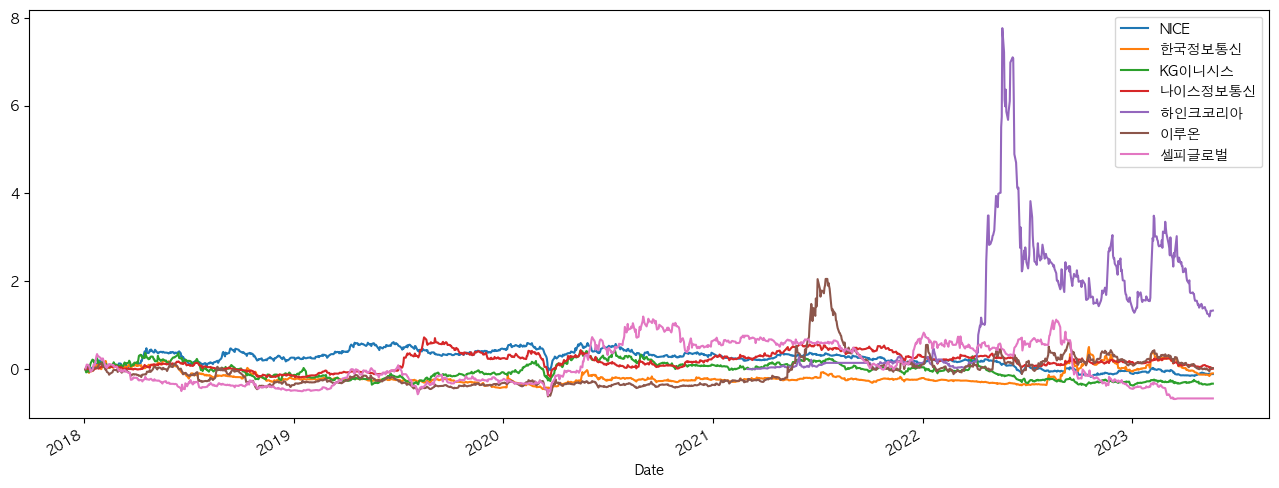

In [21]:
cum_ror.plot(figsize = (16, 6))

In [22]:
# 오늘부터 5/10/../120/240 일전 부터 현재까지의 수익률

In [23]:
rate_of_return.tail()

,NICE,한국정보통신,KG이니시스,나이스정보통신,하인크코리아,이루온,셀피글로벌
Date,,,,,,,
2023-05-16,0.003943,-0.014808,-0.008403,-0.024845,-0.019129,-0.014052,0.0
2023-05-17,-0.002357,0.042084,0.010169,0.008493,0.022752,0.038005,0.0
2023-05-18,-0.003937,-0.003846,0.000000,0.010526,0.036017,0.022883,0.0
2023-05-19,-0.005534,0.028958,0.020134,-0.043750,-0.002045,0.015660,0.0
2023-05-22,0.000795,0.005629,0.000822,0.008715,0.004098,-0.002203,0.0


In [24]:
from datetime import datetime, timedelta

ref_day = datetime(2023, 2, 14)
ref_day

datetime.datetime(2023, 2, 14, 0, 0)

In [25]:
# 5일전, 10일...
timedeltas = [5, 10, 20, 60, 120, 240]
result = pd.DataFrame()
for day in timedeltas:
    start_day = ref_day - timedelta(day)
    end_day = ref_day
    subset_ror = rate_of_return[start_day:end_day]
    cum_ror_df = (subset_ror + 1).cumprod() - 1
    cum_ror = cum_ror_df.iloc[-1]
    cum_ror.name = day
    result = pd.concat([result, cum_ror], axis = 1)
result

,5,10,20,60,120,240
NICE,-0.025694,-0.014055,0.050936,0.031618,0.145306,0.016667
한국정보통신,-0.110641,-0.067216,0.215702,0.210700,0.101873,0.915365
KG이니시스,-0.042630,-0.030015,0.047431,0.015326,0.132479,-0.039855
나이스정보통신,0.007117,0.019820,0.088462,0.050093,0.061914,0.107632
하인크코리아,-0.121693,0.286822,0.534196,0.255673,0.534196,-0.231481
이루온,-0.088748,-0.031987,0.118677,0.056985,0.150000,0.076779
셀피글로벌,-0.055286,-0.012698,0.178030,-0.085294,-0.233990,-0.610763


<Axes: >

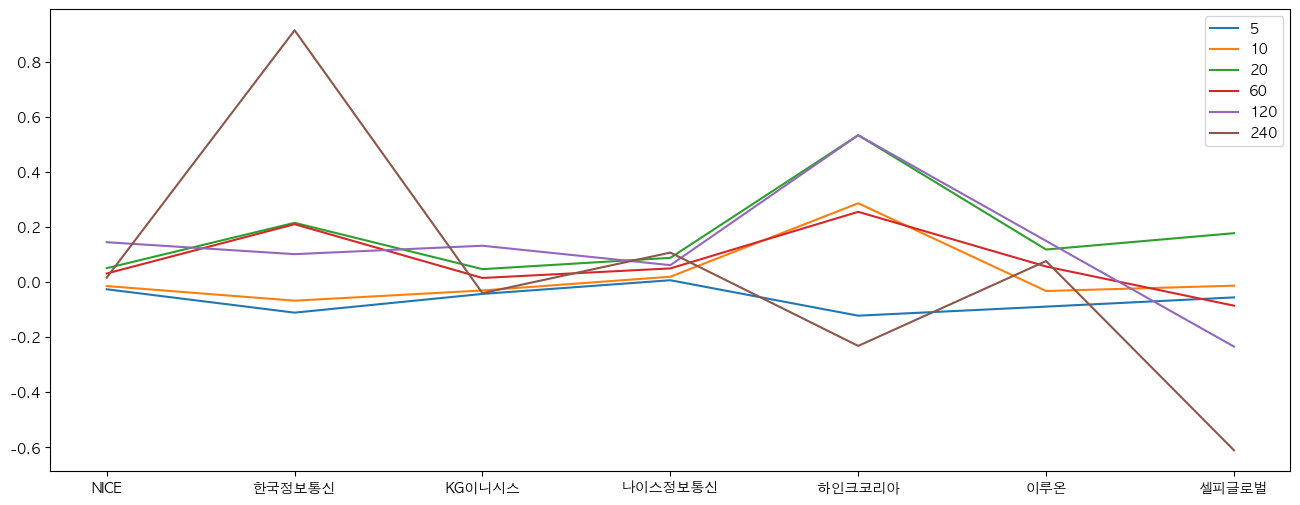

In [26]:
result.plot(figsize = (16, 6))

In [27]:
melt_result = result.reset_index().melt(id_vars = ['index'])
melt_result.head()

,index,variable,value
0,NICE,5,-0.025694
1,한국정보통신,5,-0.110641
2,KG이니시스,5,-0.042630
3,나이스정보통신,5,0.007117
4,하인크코리아,5,-0.121693


In [28]:
# melt_result['variable'] = melt_result['variable'].astype(int)

In [29]:
melt_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     42 non-null     object 
 1   variable  42 non-null     object 
 2   value     42 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.1+ KB


<Axes: xlabel='index', ylabel='value'>

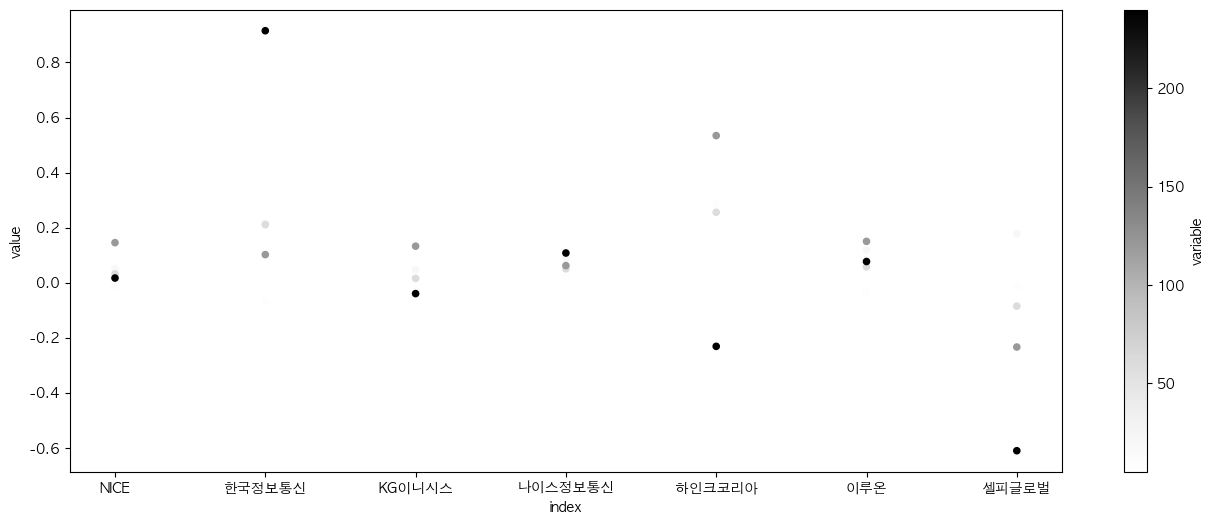

In [30]:
import seaborn as sns
melt_result.plot.scatter(x = 'index', y = 'value', c= 'variable', figsize = (16, 6))

In [31]:
result.style.background_gradient(cmap='coolwarm') # Blues

,5,10,20,60,120,240
NICE,-0.025694,-0.014055,0.050936,0.031618,0.145306,0.016667
한국정보통신,-0.110641,-0.067216,0.215702,0.210700,0.101873,0.915365
KG이니시스,-0.042630,-0.030015,0.047431,0.015326,0.132479,-0.039855
나이스정보통신,0.007117,0.019820,0.088462,0.050093,0.061914,0.107632
하인크코리아,-0.121693,0.286822,0.534196,0.255673,0.534196,-0.231481
이루온,-0.088748,-0.031987,0.118677,0.056985,0.150000,0.076779
셀피글로벌,-0.055286,-0.012698,0.178030,-0.085294,-0.233990,-0.610763


In [32]:
result.mean() # 해당 기간 수익률

5     -0.062511
10     0.021524
20     0.176205
60     0.076443
120    0.127397
240    0.033477
dtype: float64

In [33]:
result.mean(axis = 1) # 종목의 평균 수익률

NICE       0.034130
한국정보통신     0.210964
KG이니시스     0.013789
나이스정보통신    0.055840
하인크코리아     0.209619
이루온        0.046951
셀피글로벌     -0.136667
dtype: float64